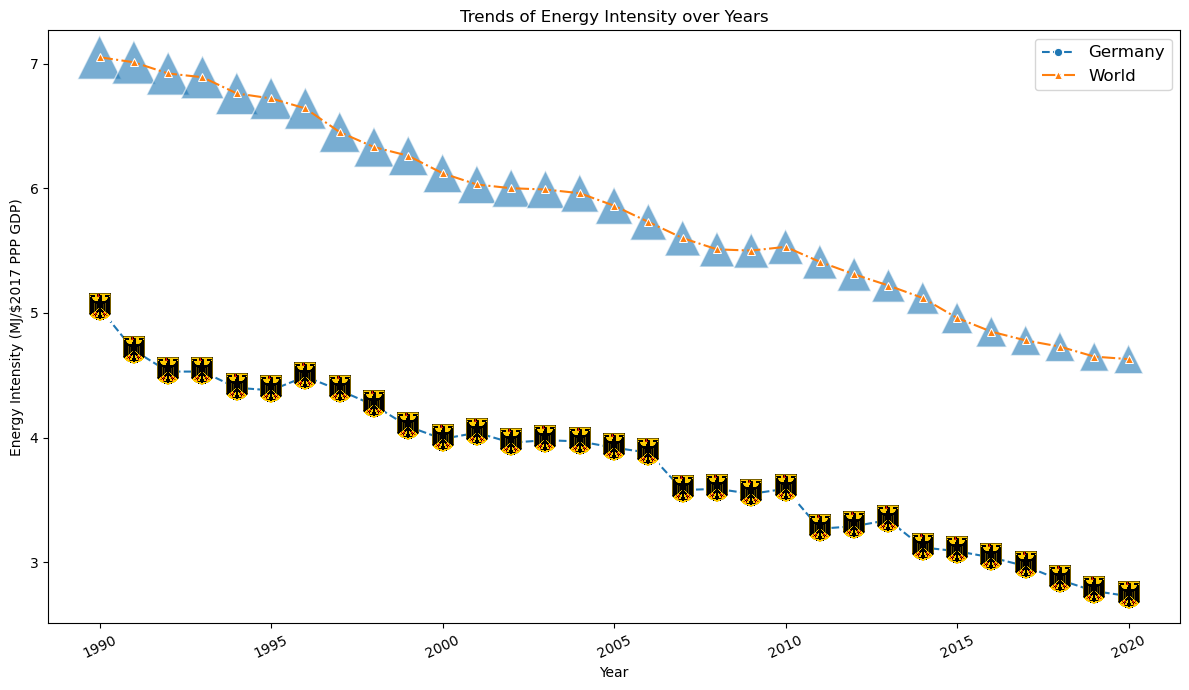

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

# Load dataset
df = pd.read_excel(r'C:\Users\Dell\Desktop\Energy\Assignment\1\Energy Intensity - Germany.xlsx', header=0)
df = df.set_index('Year')

# Load Germany's flag image
flag = mpimg.imread('germany.jpg')

# Function to place Germany's flag as markers
def place_flag_on_plot(ax, x_data, y_data, image):
    for x, y in zip(x_data, y_data):
        im = OffsetImage(image, zoom=0.08)
        ab = AnnotationBbox(im, (x, y), frameon=False)
        ax.add_artist(ab)

# Melt the dataframe for seaborn
df_melted = df.reset_index().melt(id_vars='Year', value_vars=['Germany', 'World'],
                                  var_name='Country', value_name='Value')

# Define styles for each country
style_dict = {
    'Germany': {'marker': 'o', 'linestyle': '--'},
    'World': {'marker': '^', 'linestyle': '-.'},
}

# Normalize the bubble size
max_value = df_melted['Value'].max()
min_value = df_melted['Value'].min()
df_melted['Bubble Size'] = (df_melted['Value'] - min_value) / (max_value - min_value) * 1000  # Scale from 0 to 1000

# Plot
fig, ax = plt.subplots(figsize=(12, 7))
for country in df_melted['Country'].unique():
    subset = df_melted[df_melted['Country'] == country]
    
    # Line plot for trends
    sns.lineplot(data=subset, x='Year', y='Value', label=country,
                 marker=style_dict[country]['marker'],
                 linestyle=style_dict[country]['linestyle'], ax=ax)
    
    # If it's Germany, replace markers with flag
    if country == 'Germany':
        place_flag_on_plot(ax, subset['Year'], subset['Value'], flag)
    else:
        # Adding bubbles (scatter plot) for data points
        ax.scatter(subset['Year'], subset['Value'],
                   s=subset['Bubble Size'], alpha=0.6, edgecolors='w',
                   marker=style_dict[country]['marker'])

plt.title('Trends of Energy Intensity over Years')
plt.xlabel('Year')
plt.ylabel('Energy Intensity (MJ/$2017 PPP GDP)')
plt.legend(fontsize=12)
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()


In [5]:
# Calculation of CAGR and other statistics
def calculate_cagr(start, end, years):
    return ((end / start) ** (1 / years) - 1) * 100

stats = {}
for country in ['Germany', 'World']:
    start_value = df[country].iloc[0]
    end_value = df[country].iloc[-1]
    years = df.index[-1] - df.index[0]
    stats[country] = {
        'CAGR': calculate_cagr(start_value, end_value, years),
        'Min Value': df[country].min(),
        'Max Value': df[country].max(),
        'Mean Value': df[country].mean(),
        'Standard Deviation': df[country].std()
    }

stats_df = pd.DataFrame(stats).T
print(stats_df)

             CAGR  Min Value  Max Value  Mean Value  Standard Deviation
Germany -2.022940       2.73       5.04    3.784839            0.624136
World   -1.391793       4.63       7.05    5.823226            0.754305
